# Challenge: sentiment analysis with Naive bayes

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
PATH = r'C:\Users\latee\Downloads\sentiment labelled sentences\sentiment labelled sentences\imdb_labelled.txt'

IMDB = pd.read_csv(PATH, delimiter= '\t', header=None)
IMDB.columns = ['review', 'sentiment']

### I've never analyzed movie review data before and do not know what to expect. So I made a word cloud to learn about what words are used in the "review" section of the dataset. 

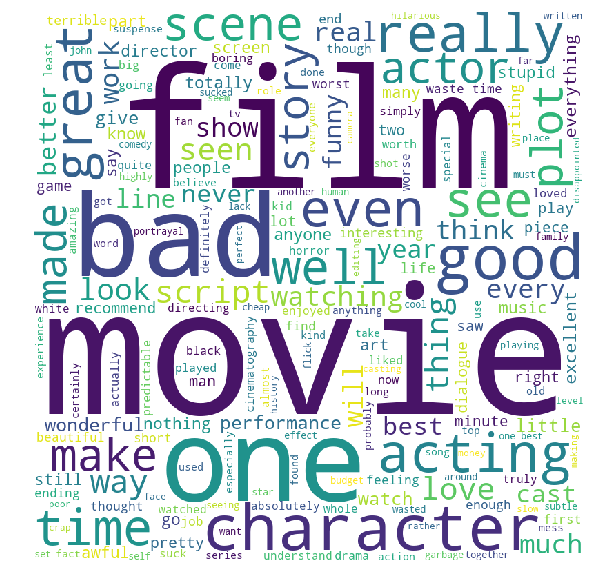

In [3]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in IMDB.review: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [4]:
keywords = ['bad', 'funny', 'best', 'great', 'terrible', 'love', 'good', 'plot', 'never', 'real', 'really', 'script',
           'one', 'actor', 'see', 'little', 'make', 'way', 'recommend', 'line', 'movie', 'film', 'acting', 'even',
           'scene', 'watching', 'excellent', 'seen', 'piece', 'say', 'show', 'dialogue', 'perfect', 'cheap', 'thing']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    IMDB[str(key)] = IMDB.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

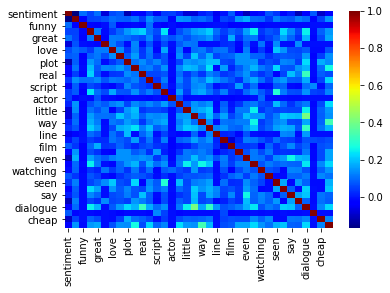

In [5]:
sns.heatmap(IMDB.corr(), cmap='jet')

### Would PCA help? I don't know, but lets try it out!

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(IMDB[['bad', 'funny', 'best', 'great',
                                        'terrible', 'love', 'good', 'plot',
                                        'never', 'real', 'really', 'script',
                                        'one', 'actor', 'see', 'little', 'make',
                                        'way', 'recommend', 'line', 'movie', 'film',
                                        'acting', 'even', 'scene', 'watching', 'excellent',
                                        'seen', 'piece', 'say', 'show', 'dialogue', 'perfect',
                                        'cheap', 'thing']])
sklearn_pca = PCA(n_components=1)
IMDB["pca_1"] = sklearn_pca.fit_transform(X)

print('The percentage of total variance in the dataset explained by each',
      'component from Sklearn PCA.\n',
      sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.12329676]


C:\Users\latee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\latee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### The pca_1 isn't big enough to be useful for improving the models accuracy. 

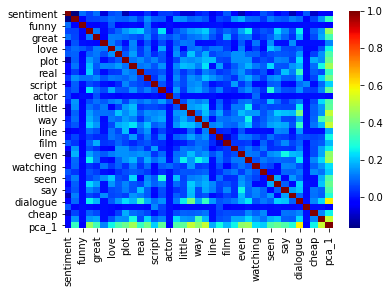

In [7]:
sns.heatmap(IMDB.corr(), cmap='jet')

In [8]:
data = IMDB[keywords]
target = IMDB['sentiment']

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 281


62.43% accuracy

### The more keywords I use, the better the model's performance is. 

The first time I ran the model the number of mislabeled points was 364, from there I started adding keywords from the word cloud regardless of how I thought they might correlate with each other and the model still improved in accuracy. 

### Below I use the same model to predict sentiment on a different dataset

## Confusion Matrix

The next level of analysis of your classifier is often something called a Confusion Matrix. This is a matrix that shows the count of each possible permutation of target and prediction. So in our case, it will show the counts for when a message was ham and we predicted ham, when a message was ham and we predicted spam, when a message was spam and we predicted ham, and when a message was spam and we predicted spam.

SKLearn has a built in confusion matrix function, so let's quickly import that and generate one here.

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[119, 243],
       [ 38, 348]], dtype=int64)

Firstly, when we talk about errors in a binary classifier (where there are only two outcomes) we're generally referring to two kinds of errors. 

A __false positive__ is when we identify something as positive that is not. In this case we had 243 of these. This is sometimes also called a "Type I Error" or a "false alarm".

A __false negative__ is therefore when we mistakenly identify as negative when it is. We had 38 of these. This is also called a "Type II Error" or a "miss".

This also brings us to a conversation of sensitivity vs specificity.

__Sensitivity__ is the percentage of positives correctly identified, in our case 348/386 or 90.15%. This shows how good we are at catching positives, or how sensitive our model is to identifying positives.

__Specificity__ is just the opposite, the percentage of negatives correctly identified, 119/362 or 32.87%.



In [11]:
PATH = r'C:\Users\latee\Downloads\sentiment labelled sentences\sentiment labelled sentences\amazon_cells_labelled.txt'

AMAZON = pd.read_csv(PATH, delimiter= '\t', header=None)
AMAZON.columns = ['review', 'sentiment']

In [12]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    AMAZON[str(key)] = AMAZON.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [13]:
data = AMAZON[keywords]
target = AMAZON['sentiment']

In [14]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 389


To my surprise, the model performs similarly well on a different data set!

In [15]:
confusion_matrix(target, y_pred)

array([[456,  44],
       [345, 155]], dtype=int64)

Sensitivity is 31%

Specificity is 91.2%


Surprisingly, the model performed reversingly similar-like on the second data set than on the first. 